# Assignment-02 DAI-101

This assignment focuses on developing a tipping prediction model which can assist in predicting tip amounts based on the information present on customer bills and demographic details. This will be instrumental for restaurants in trying to evaluate the different dimensions that affect tipping behavior and take informed actions to tweak their services to promote ideal tipping.

Goal

Detect important variables: Understand how the various factors (like total bill, time of day, etc.) affect tips and identify which ones have more weight.

Formulate and Test Models: Employ multiple regression techniques such as Linear Regression, Ridge, Lasso, Decision Trees et al, to build and evaluate models geared towards predicting tips.

Generate Management Reports: Based on the predictions made by the model, provide workable strategies to help restaurant management improve the quality of service delivery and increase the revenues.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.api import linear_rainbow
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [2]:
dh = pd.read_csv(r'C:\Users\aashi\Downloads\tips (data for regression problem).csv')

In [3]:
dh.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
dh.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [5]:
dh.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [6]:
dh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [8]:
scaler = StandardScaler()
dh[['total_bill', 'size']] = scaler.fit_transform(dh[['total_bill', 'size']])

In [9]:
#converting categorical into numerical
dh = pd.get_dummies(dh, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)

In [10]:
dh

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,-0.314711,1.01,-0.600193,False,False,False,True,False,False
1,-1.063235,1.66,0.453383,True,False,False,True,False,False
2,0.137780,3.50,0.453383,True,False,False,True,False,False
3,0.438315,3.31,-0.600193,True,False,False,True,False,False
4,0.540745,3.61,1.506958,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...
239,1.040511,5.92,0.453383,True,False,True,False,False,False
240,0.832275,2.00,-0.600193,False,True,True,False,False,False
241,0.324630,2.00,-0.600193,True,True,True,False,False,False
242,-0.221287,1.75,-0.600193,True,False,True,False,False,False


# EDA

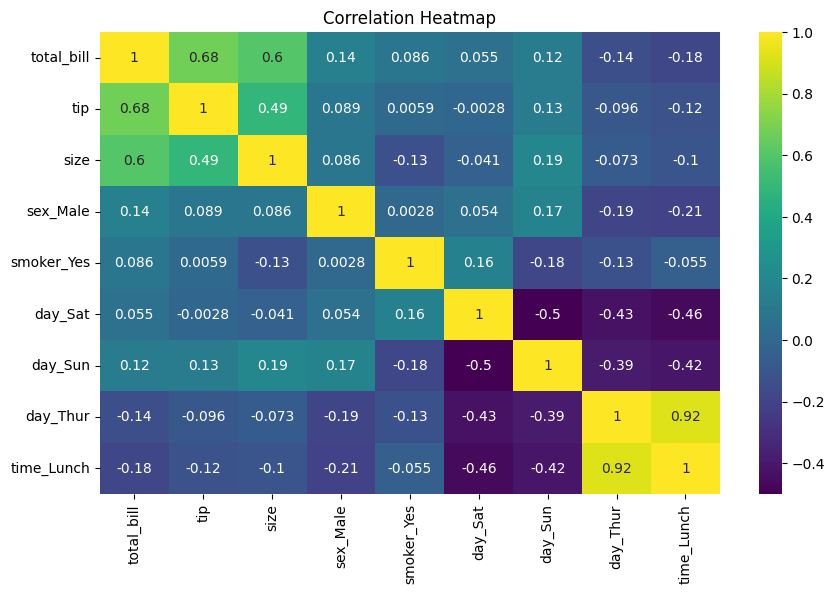

In [11]:
#Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(dh.corr(), annot=True, cmap="viridis")
plt.title("Correlation Heatmap")
plt.show()

> This plot shows the correlation of features wih each other and which shows close to linear relation between total_bill and tip

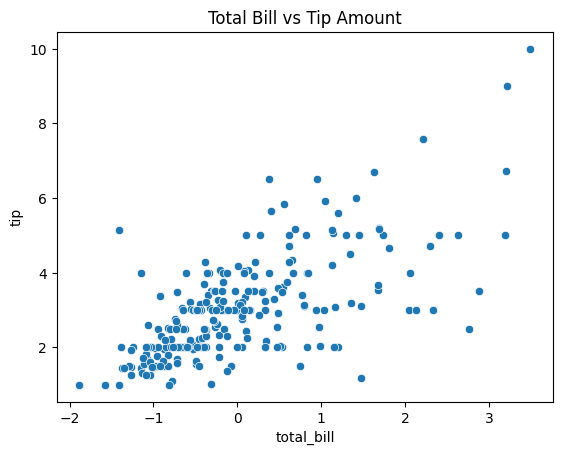

In [45]:
#Scatter plot
sns.scatterplot(data=dh, x='total_bill', y='tip')
plt.title("Total Bill vs Tip Amount")
plt.show()

> This shows a scatter plot between the features total_bill and tip which shows a relationship which is approximately near to linear

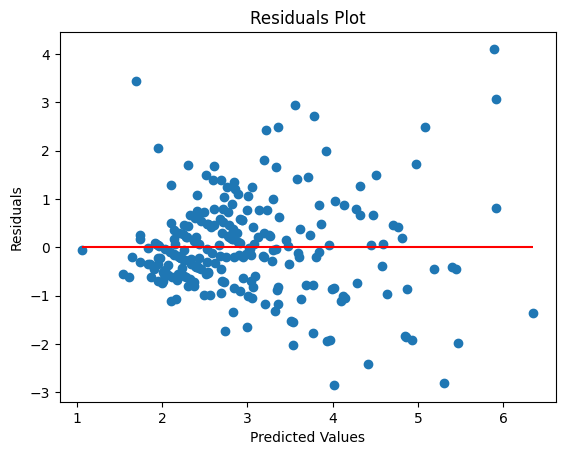

In [13]:
# Residuals Plot
X = dh.drop('tip', axis=1)
y = dh['tip']
model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)

residuals = y - predictions
plt.scatter(predictions, residuals)
plt.hlines(0, xmin=predictions.min(), xmax=predictions.max(), color="red")
plt.title("Residuals Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

>The residuals plot shows generally random scatter around the zero line, which seems a decent fit; however, some points are really outliers due to the way residuals are climbing along with predicted values, so it might fit well enough to deal with those variance issues or to try an alternative, maybe non-linear model.

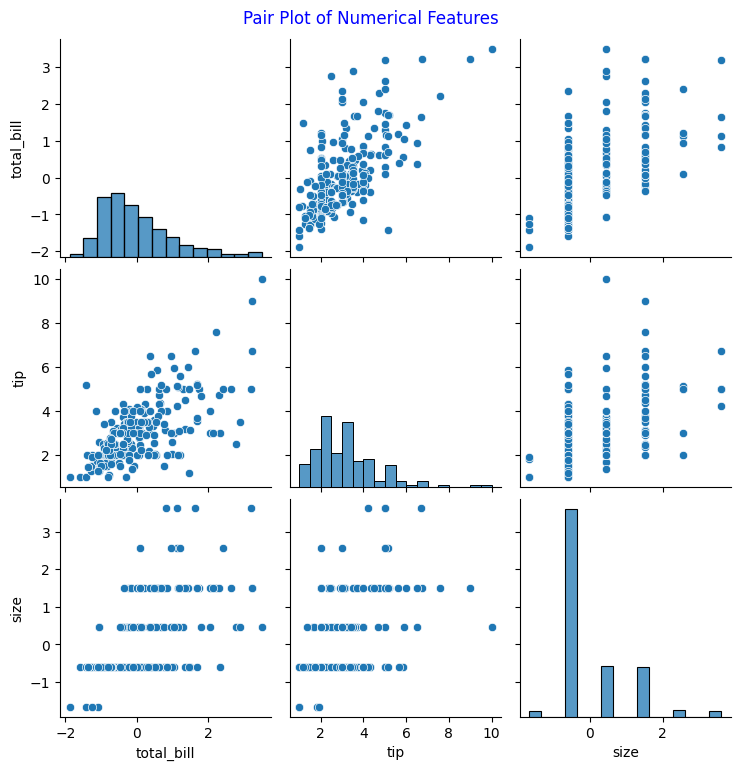

In [14]:
#pair-plot of numerical
sns.pairplot(dh[['total_bill', 'tip', 'size']],palette='Paired')
plt.suptitle("Pair Plot of Numerical Features", y=1.02,color='b')
plt.show()

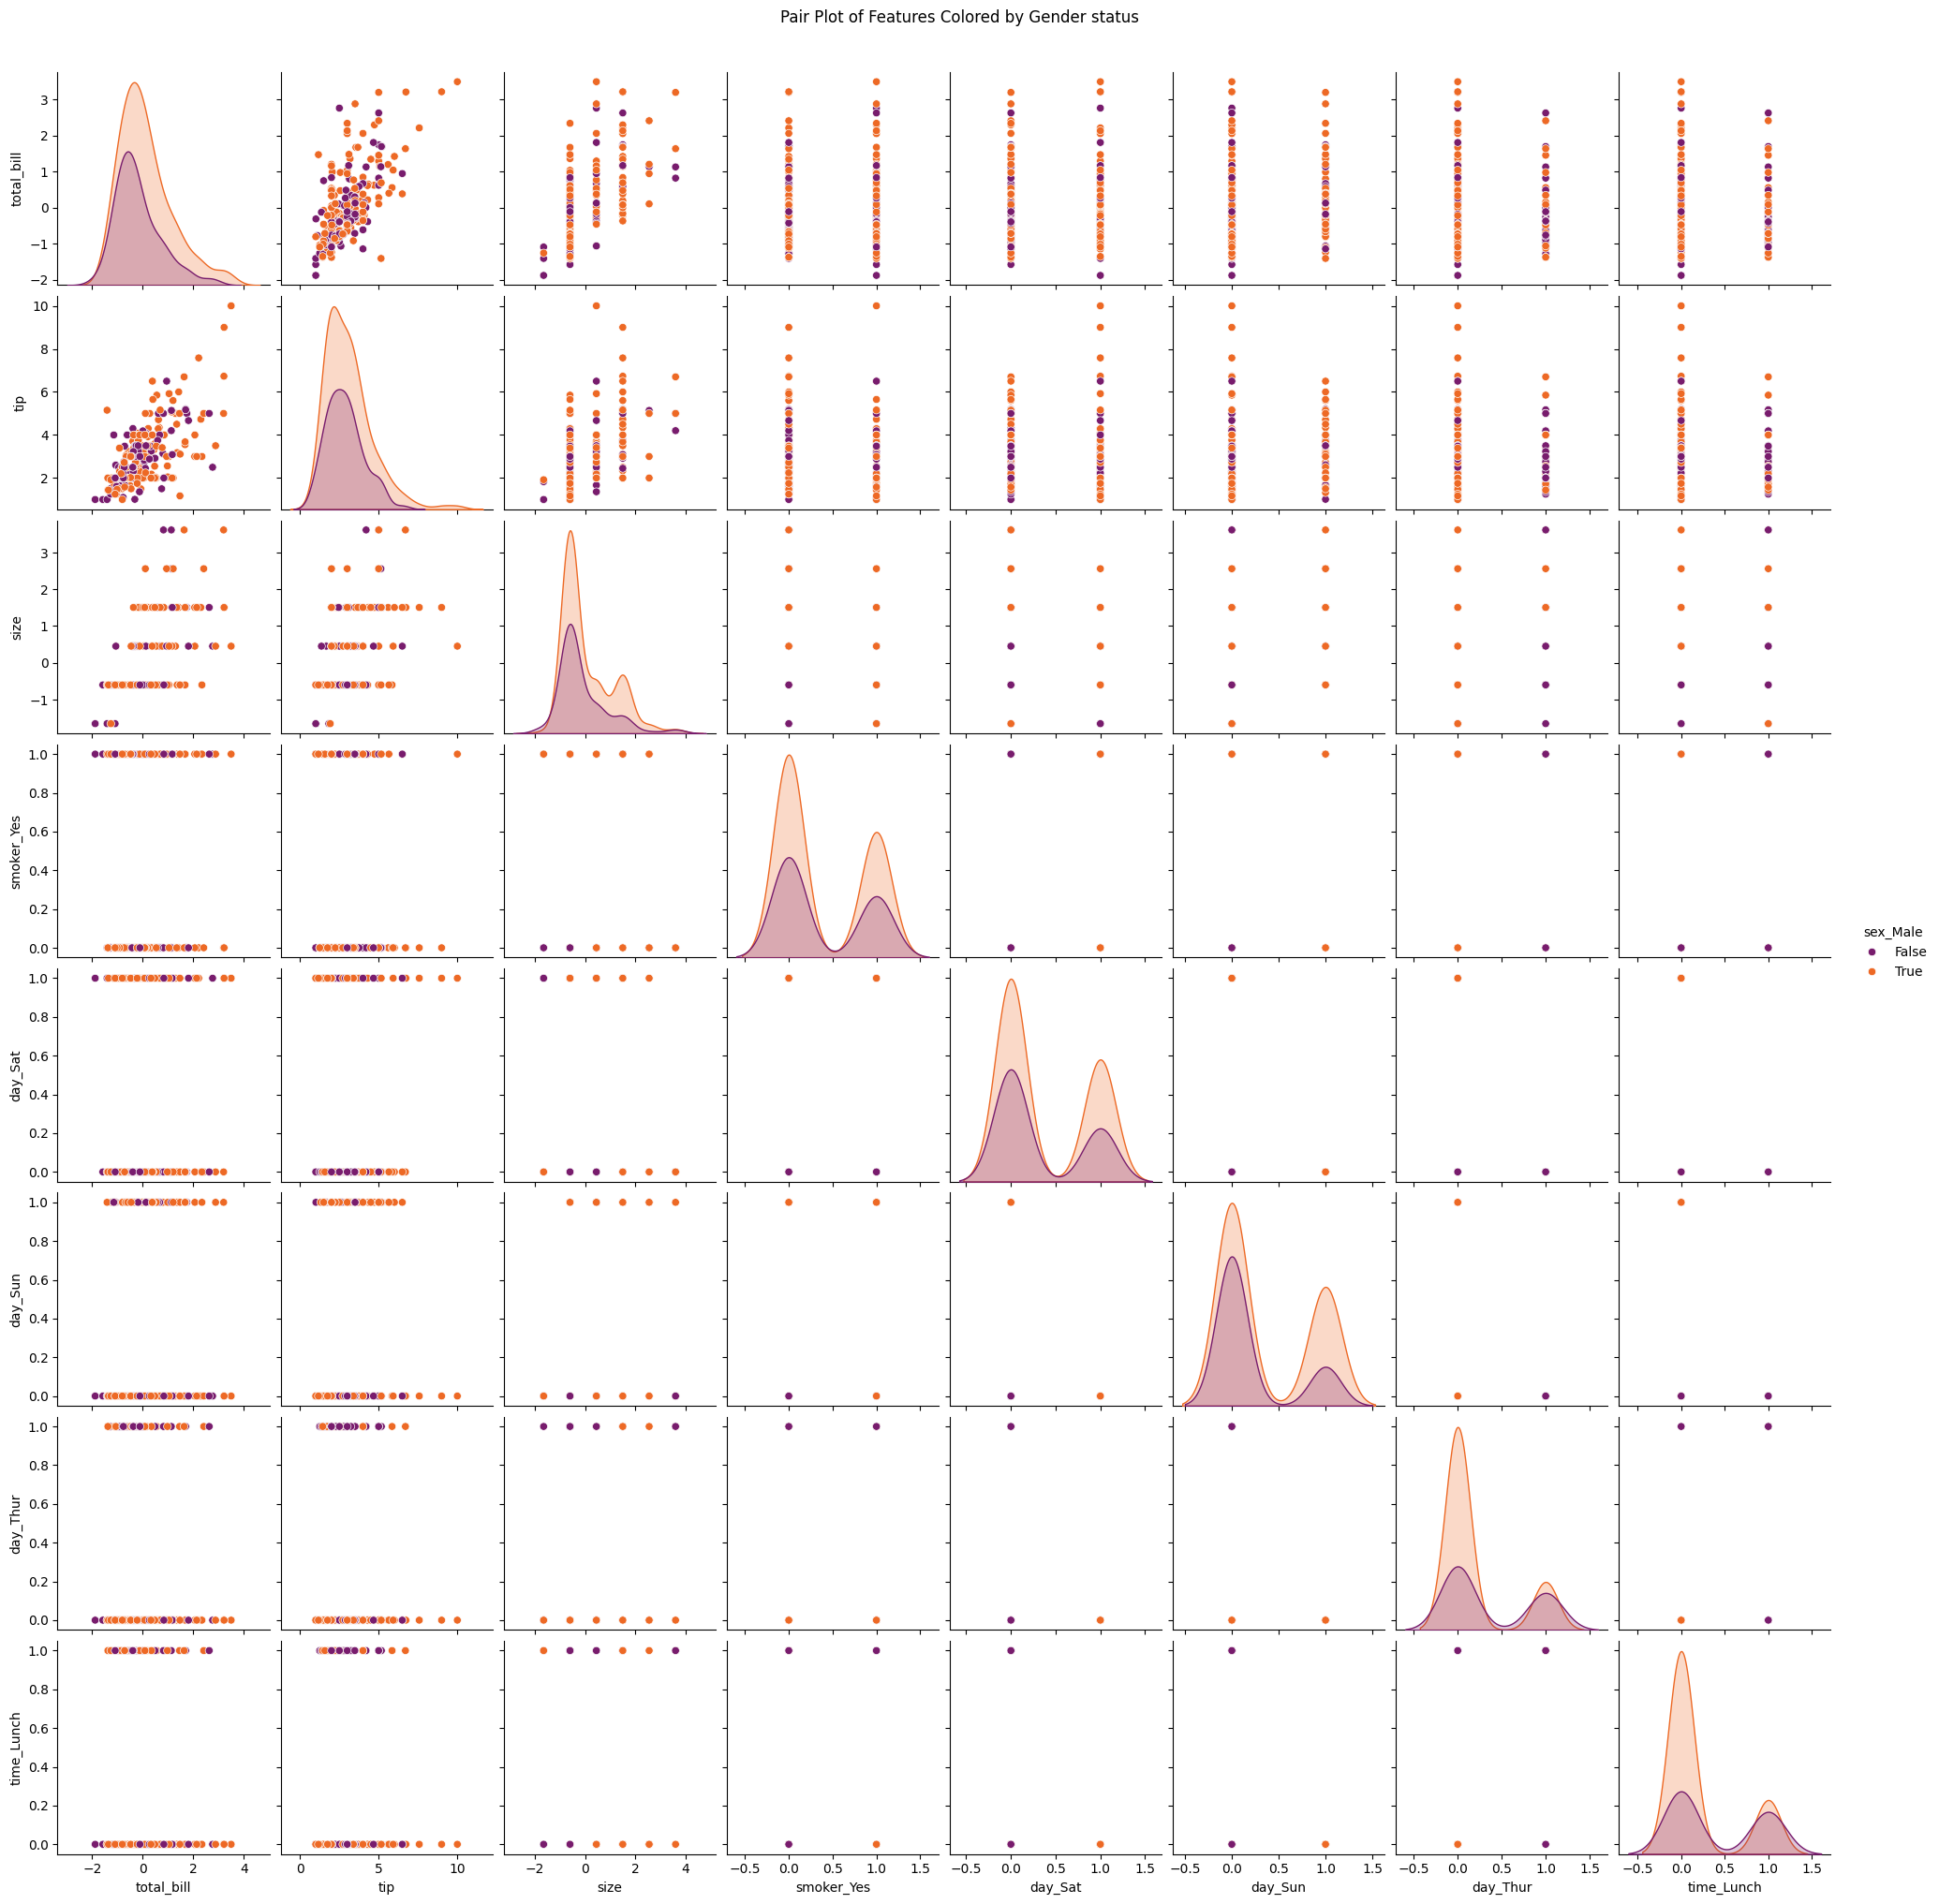

In [15]:
#pair-plot according to one of categorical variable
sns.pairplot(dh, hue='sex_Male',palette='inferno')
plt.suptitle("Pair Plot of Features Colored by Gender status", y=1.02)
plt.show()

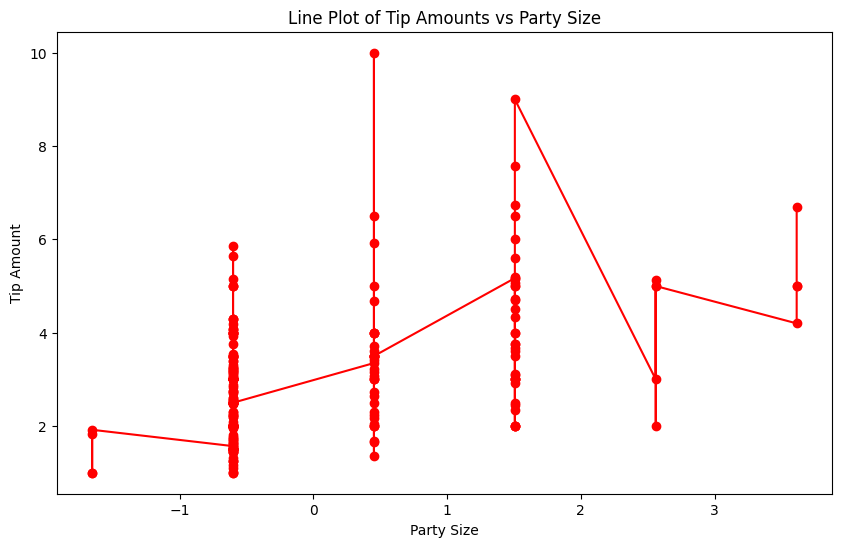

In [16]:
dhs1 = dh.sort_values(by='size')

# Line plot of size vs tip
plt.figure(figsize=(10, 6))
plt.plot(dhs1['size'], dhs1['tip'], marker='o', linestyle='-', color='red')
plt.title("Line Plot of Tip Amounts vs Party Size")
plt.xlabel("Party Size")
plt.ylabel("Tip Amount")
plt.show()

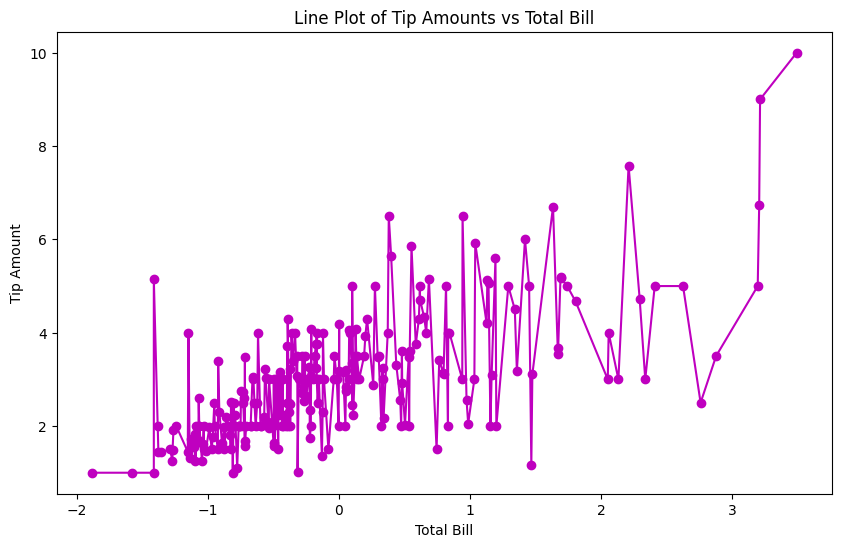

In [17]:
dhs=dh.sort_values(by='total_bill')

# Line plot of total_bill vs tip
plt.figure(figsize=(10, 6))
plt.plot(dhs['total_bill'], dhs['tip'], marker='o', linestyle='-', color='m')
plt.title("Line Plot of Tip Amounts vs Total Bill")
plt.xlabel("Total Bill")
plt.ylabel("Tip Amount")
plt.show()

In [18]:
X=X.astype(float)
X0 = sm.add_constant(X)  # Add intercept for statsmodels
model0 = sm.OLS(y, X0).fit()
rs, rp = linear_rainbow(model0)
print(f"Rainbow Test p-value: {rp}")

Rainbow Test p-value: 0.16588383059241668


> The high value (>0.5) of P generally suggests that Linear model must be used

# Model Evaluation

In [19]:
#Seperating the data into 80%train and 20%test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"MAE: {mae}, MSE: {mse}, R2: {r2}")
    return model

In [25]:
print("Linear Regression:")
lr = LinearRegression()
evaluate_model(lr, X_train, X_test, y_train, y_test)

Linear Regression:
MAE: 0.6671331480264892, MSE: 0.7033566017436103, R2: 0.43730181943482516


LinearRegression()

In [27]:
linear = LinearRegression().fit(X_train, y_train)
print("Feature Importance in Linear Regression:")
flin=pd.Series(linear.coef_, index=X.columns).sort_values(ascending=False)
print(flin)

Feature Importance in Linear Regression:
total_bill    0.841327
size          0.221611
time_Lunch    0.094957
sex_Male      0.028819
day_Sun      -0.050793
day_Thur     -0.179721
day_Sat      -0.185785
smoker_Yes   -0.192353
dtype: float64


In [28]:
print("Decision Tree Regression:")
dtr = DecisionTreeRegressor(max_depth=5, random_state=42)
evaluate_model(dtr, X_train, X_test, y_train, y_test)

Decision Tree Regression:
MAE: 0.6905450649124119, MSE: 0.8489901694047068, R2: 0.32079229446702484


DecisionTreeRegressor(max_depth=5, random_state=42)

In [30]:
tree = DecisionTreeRegressor().fit(X_train, y_train)
print("Feature Importance in Decision Tree Regression:")
ftre=pd.Series(tree.feature_importances_, index=X.columns).sort_values(ascending=False)
print(ftre)

Feature Importance in Decision Tree Regression:
total_bill    0.763909
smoker_Yes    0.090290
size          0.053414
day_Sun       0.027861
sex_Male      0.026184
time_Lunch    0.018181
day_Sat       0.012737
day_Thur      0.007423
dtype: float64


In [31]:
print("Ridge Regression:")
ridge = Ridge(alpha=1.0)
evaluate_model(ridge, X_train, X_test, y_train, y_test)

Ridge Regression:
MAE: 0.6668621239595699, MSE: 0.7006322795075867, R2: 0.43948132718620403


Ridge()

In [35]:
ridge1 = Ridge().fit(X_train, y_train)
print("Feature Importance in Ridge Regression:")
frid=pd.Series(ridge1.coef_, index=X.columns).sort_values(ascending=False)
print(frid)

Feature Importance in Ridge Regression:
total_bill    0.833833
size          0.224030
time_Lunch    0.073649
sex_Male      0.028346
day_Sun      -0.032158
day_Thur     -0.140310
day_Sat      -0.167010
smoker_Yes   -0.181977
dtype: float64


In [38]:
print("Random Forest Regression:")
rf = RandomForestRegressor(n_estimators=100, random_state=42)
evaluate_model(rf, X_train, X_test, y_train, y_test)

Random Forest Regression:
MAE: 0.7532163265306124, MSE: 0.919451825714287, R2: 0.2644216771916328


RandomForestRegressor(random_state=42)

In [39]:
print("Feature Importance in Random Forest:")
random = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(random)

Feature Importance in Random Forest:
total_bill    0.767043
smoker_Yes    0.069417
size          0.058045
day_Sat       0.030292
day_Sun       0.025223
sex_Male      0.025187
time_Lunch    0.012975
day_Thur      0.011818
dtype: float64


In [32]:
print("Lasso Regression:")
lasso = Lasso(alpha=0.1)
evaluate_model(lasso, X_train, X_test, y_train, y_test)

Lasso Regression:
MAE: 0.654882734592278, MSE: 0.6121051239307195, R2: 0.5103046751866707


Lasso(alpha=0.1)

In [37]:
lasso1= Lasso().fit(X_train, y_train)
print("Feature Importance in Lasso Regression:")
flas=pd.Series(lasso1.coef_, index=X.columns).sort_values(ascending=False)
print(flas)

Feature Importance in Lasso Regression:
total_bill    0.0
size          0.0
sex_Male      0.0
smoker_Yes   -0.0
day_Sat       0.0
day_Sun       0.0
day_Thur     -0.0
time_Lunch   -0.0
dtype: float64


In [42]:
print("K-Nearest Neighbors Regression:")
knn = KNeighborsRegressor(n_neighbors=5)
evaluate_model(knn, X_train, X_test, y_train, y_test)

K-Nearest Neighbors Regression:
MAE: 0.7199591836734693, MSE: 0.8376828571428571, R2: 0.32983835164634523


KNeighborsRegressor()

In [43]:
knn1 = KNeighborsRegressor().fit(X_train, y_train)
pknn = permutation_importance(knn1, X_train, y_train, n_repeats=10, random_state=42)
print("Feature Importance in KNN Regression:")
fKnn = pd.Series(pknn.importances_mean, index=X.columns).sort_values(ascending=False)
print(fKnn)

Feature Importance in KNN Regression:
total_bill    0.630671
size          0.212841
smoker_Yes    0.071091
day_Sat       0.015675
sex_Male     -0.005881
time_Lunch   -0.006068
day_Thur     -0.007369
day_Sun      -0.007717
dtype: float64


In [40]:
print("Support Vector Regression:")
svreg = SVR(kernel='rbf', C=100, epsilon=0.1)
evaluate_model(svreg, X_train, X_test, y_train, y_test)

Support Vector Regression:
MAE: 0.858641003763428, MSE: 1.3938342268306638, R2: -0.11509294361180977


SVR(C=100)

In [41]:
svr_1 = SVR().fit(X_train, y_train)
perm = permutation_importance(svr_1, X_train, y_train, n_repeats=10, random_state=42)
print("Feature Importance in Support Vector Regression:")
fsvreg=pd.Series(perm.importances_mean, index=X.columns).sort_values(ascending=False)
print(fsvreg)

Feature Importance in Support Vector Regression:
total_bill    0.641324
size          0.168903
smoker_Yes    0.088033
day_Sun       0.038958
day_Sat       0.032417
sex_Male      0.020847
day_Thur      0.014316
time_Lunch    0.013110
dtype: float64


> Based on above obtained results we can clearly see that the model of Lasso Regression test has the least MSE and R² values which makes it best for use.

> Therefore, it can be said that Lasso Regression would be best model for this dataset as it also reduces overfitting.